### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning
from sklearn.metrics import f1_score

### Reading the dataset

In [2]:
df = pd.read_csv(r'dataset_part_2.csv')
X = pd.read_csv(r'dataset_part_3.csv')
X = X.drop('FlightNumber', axis = 1)

In [3]:
X.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,8191.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting the Class column to a numpy array

In [4]:
Y = df['Class']
Y

0      0
1      0
2      0
3      0
4      0
      ..
163    1
164    1
165    1
166    1
167    1
Name: Class, Length: 168, dtype: int64

### Splitting the dataset into training and testing

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [6]:
X_train.shape

(134, 91)

In [7]:
Y_test.shape #checking the shape

(34,)

### Scaling the X data frame with StandardScaler

In [8]:
#converts the dataframe into a numpy array
scaler = preprocessing.StandardScaler()
scale = scaler.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

#converting the numpy array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,0.933225,1.482205,0.368230,0.711068,0.711068,0.536895,0.465488,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,4.259443,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
1,1.391849,0.299970,0.368230,0.711068,0.711068,0.536895,0.677650,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
2,-1.383418,-0.882265,0.368230,-1.406335,-1.406335,0.536895,0.041166,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,4.259443,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
3,-0.836596,-0.586706,0.368230,0.711068,0.711068,-0.977713,-1.019641,0.0,-0.123091,2.088061,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
4,0.933225,2.368882,0.368230,0.711068,0.711068,0.536895,1.314134,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-1.278170,-0.586706,0.368230,0.711068,0.711068,0.536895,-0.170996,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
130,-0.060266,-0.882265,0.368230,-1.406335,-1.406335,-0.220409,-1.019641,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
131,-1.223292,-0.882265,0.368230,-1.406335,-1.406335,-1.735017,-1.019641,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711
132,-0.060266,0.004411,-2.715695,0.711068,0.711068,0.536895,-0.595318,0.0,-0.123091,-0.478913,...,-0.327777,-0.251976,-0.234772,-0.234772,-0.175412,-0.123091,-0.15133,-0.086711,-0.123091,-0.086711


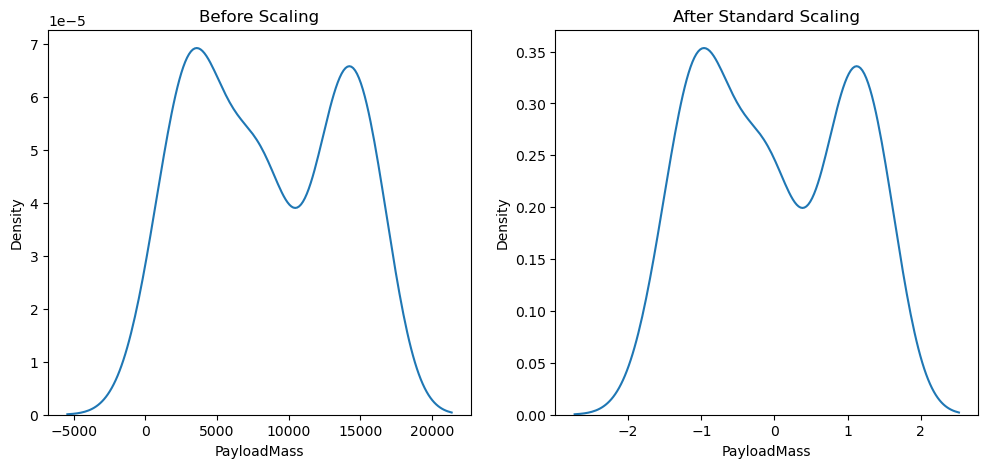

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling, considering payload mass
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['PayloadMass'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['PayloadMass'], ax=ax2)
plt.show()

#distribution remains the same for individual features, only the scale changes

### Finding best parameters for different alogorithms using GridSearchCV

### Logistic Regression()

In [10]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs'], 'max_iter' : [1000] }# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid = parameters, cv = 10)
logreg_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [1000],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

### Training and testing accuracy and best parameters

In [11]:
print("tuned hyperparameters :(best parameters):",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("test accuracy:" , logreg_cv.score(X_test_scaled,Y_test))

tuned hyperparameters :(best parameters): {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8725274725274724
test accuracy: 0.8823529411764706


### Defining a function for confusion predict which takes predicted and testing values as inputs

In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

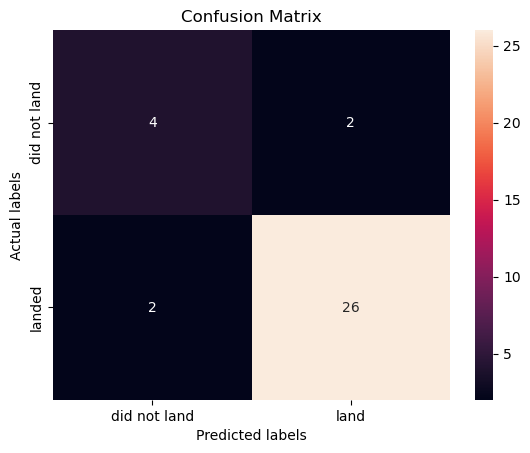

In [13]:
yhat_logreg=logreg_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat_logreg)

### SVM

In [14]:
parameters = {'kernel':['linear', 'rbf','poly' ,'sigmoid'],
               'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [15]:
svm_cv = GridSearchCV(svm, param_grid = parameters, cv = 10)
svm_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [16]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :" ,svm_cv.best_score_)
print('test accuracy: ', svm_cv.score(X_test_scaled, Y_test))

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.9181318681318682
test accuracy:  0.9117647058823529


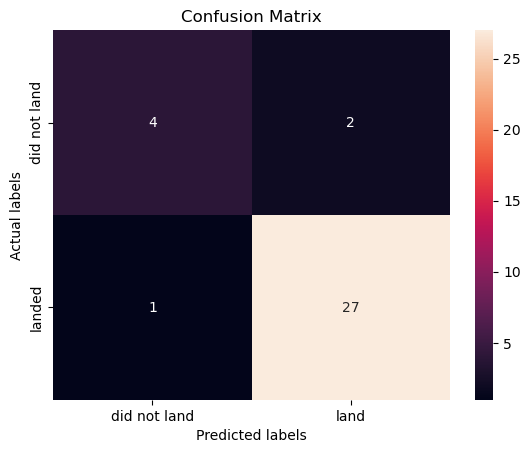

In [17]:
yhat_svm=svm_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat_svm)

### DecisionTreeClassifier

In [18]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_grid = parameters, cv = 10)
tree_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
print("testing accuracy : ", tree_cv.score(X_test_scaled, Y_test))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9170329670329671
testing accuracy :  0.9117647058823529


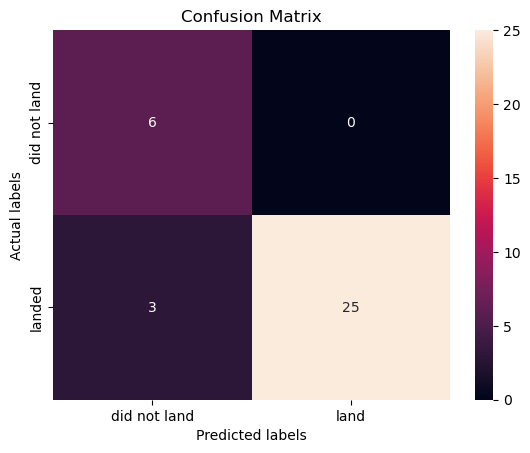

In [20]:
yhat_tree = tree_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat_tree)

### K-Nearest Neighbours

In [21]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid = parameters, cv = 10)
knn_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [22]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
print('testing accuracy: ' , knn_cv.score(X_test_scaled, Y_test))

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 1}
accuracy : 0.8950549450549451
testing accuracy:  0.8529411764705882


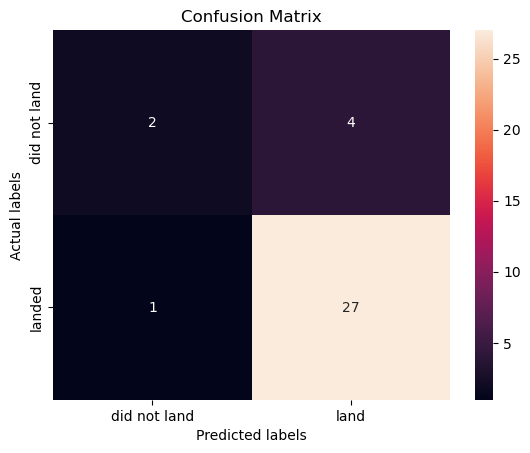

In [23]:
yhat_knn = knn_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat_knn)

### Finding the best model


In [24]:
#scores on the test set
logreg_score = logreg_cv.score(X_test_scaled,Y_test)
svm_score = svm_cv.score(X_test_scaled,Y_test)
tree_score = tree_cv.score(X_test_scaled,Y_test)
knn_score = knn_cv.score(X_test_scaled,Y_test)

accuracy = [logreg_score, svm_score, tree_score, knn_score]

f1_logreg = f1_score(Y_test, yhat_logreg, average = 'binary')
f1_svm = f1_score(Y_test, yhat_svm, average = 'binary')
f1_knn = f1_score(Y_test, yhat_knn, average = 'binary')
f1_tree = f1_score(Y_test, yhat_tree, average = 'binary')

f1_scores = [f1_logreg,f1_svm ,f1_tree ,f1_knn]

best_logreg = logreg_cv.best_score_
best_svm = svm_cv.best_score_
best_tree = tree_cv.best_score_
best_knn = knn_cv.best_score_

best_scores = [best_logreg,best_svm ,best_tree,best_knn]

algorithms = ['Logistic Regression', 'Support Vector Machine', 'DecisionTreeClassifier', 'KNN']

model = {'ML Algorithm': algorithms, 'Accuracy': accuracy, 'F1 Score' : f1_scores, 
         'Best Scores': best_scores}


best_model = pd.DataFrame(model)
best_model

,ML Algorithm,Accuracy,F1 Score,Best Scores
0,Logistic Regression,0.882353,0.928571,0.872527
1,Support Vector Machine,0.911765,0.947368,0.918132
2,DecisionTreeClassifier,0.911765,0.943396,0.917033
3,KNN,0.852941,0.915254,0.895055


In [25]:
best = best_model['ML Algorithm'].max()
print(f'Best Model is : {best}')

Best Model is : Support Vector Machine
